# ArXiv API: parsing and paging

In [3]:
import urllib.request
import feedparser

In [4]:
import time

# Base api query url
base_url = 'http://export.arxiv.org/api/query?'
cat_list = ['math.AG', # Mathematics - Algebraic Geometry
'math.AT', # Mathematics - Algebraic Topology
'math.AP', # Mathematics - Analysis of PDEs
'math.CT', # Mathematics - Category Theory
'math.CA', # Mathematics - Classical Analysis and ODEs
'math.CO', # Mathematics - Combinatorics
'math.AC', # Mathematics - Commutative Algebra
'math.CV', # Mathematics - Complex Variables
'math.DG', # Mathematics - Differential Geometry
'math.DS', # Mathematics - Dynamical Systems
'math.FA', # Mathematics - Functional Analysis
'math.GM', # Mathematics - General Mathematics
'math.GN', # Mathematics - General Topology
'math.GT', # Mathematics - Geometric Topology
'math.GR', # Mathematics - Group Theory
'math.HO', # Mathematics - History and Overview
'math.IT', # Mathematics - Information Theory
'math.KT', # Mathematics - K-Theory and Homology
'math.LO', # Mathematics - Logic
'math.MP', # Mathematics - Mathematical Physics
'math.MG', # Mathematics - Metric Geometry
'math.NT', # Mathematics - Number Theory
'math.NA', # Mathematics - Numerical Analysis
'math.OA', # Mathematics - Operator Algebras
'math.OC', # Mathematics - Optimization and Control
'math.PR', # Mathematics - Probability
'math.QA', # Mathematics - Quantum Algebra
'math.RT', # Mathematics - Representation Theory
'math.RA', # Mathematics - Rings and Algebras
'math.SP', # Mathematics - Spectral Theory
'math.ST', # Mathematics - Statistics
'math.SG', # Mathematics - Symplectic Geometry
]
titles_list = []

for cat in cat_list:

    # Search parameters
    search_query = 'cat:' + cat     # search_query = 'cat:math.AG'
    start = 0                       # start at the first result
    total_results = 4000             # want _ total results
    results_per_iteration = 500      # results at a time
    wait_time = 3                   # number of seconds to wait between calls

    print('Searching arXiv for %s' % search_query)

    for i in range(start,total_results,results_per_iteration):
    
        # print("Results %i - %i" % (i,i+results_per_iteration)
        
        query = 'search_query=%s&start=%i&max_results=%i' % (search_query,i,results_per_iteration)

        # perform a GET request using the base_url and query
        response = urllib.request.urlopen(base_url+query)

        # parse the response using feedparser
        feed = feedparser.parse(response)

        # Run through each entry, and print out title
        for entry in feed.entries:
            # print(entry.title)
            entry_clean_1 = entry.title.replace('\n ','')
            # entry_clean_2 = entry_clean_1.replace(',','')
            titles_list.append(entry_clean_1)
    
        # Remember to play nice and sleep a bit before you call the api again!
        # print('Sleeping for %i seconds' % wait_time)
        time.sleep(wait_time)

Searching arXiv for cat:math.AG
Searching arXiv for cat:math.AT
Searching arXiv for cat:math.AP
Searching arXiv for cat:math.CT
Searching arXiv for cat:math.CA
Searching arXiv for cat:math.CO
Searching arXiv for cat:math.AC
Searching arXiv for cat:math.CV
Searching arXiv for cat:math.DG
Searching arXiv for cat:math.DS
Searching arXiv for cat:math.FA
Searching arXiv for cat:math.GM
Searching arXiv for cat:math.GN
Searching arXiv for cat:math.GT
Searching arXiv for cat:math.GR
Searching arXiv for cat:math.HO
Searching arXiv for cat:math.IT
Searching arXiv for cat:math.KT
Searching arXiv for cat:math.LO
Searching arXiv for cat:math.MP
Searching arXiv for cat:math.MG
Searching arXiv for cat:math.NT
Searching arXiv for cat:math.NA
Searching arXiv for cat:math.OA
Searching arXiv for cat:math.OC
Searching arXiv for cat:math.PR
Searching arXiv for cat:math.QA
Searching arXiv for cat:math.RT
Searching arXiv for cat:math.RA
Searching arXiv for cat:math.SP
Searching arXiv for cat:math.ST
Searchin

In [35]:
# print(titles_list)

In [11]:
# with open('titles_test.csv','w') as file:
#    for title in titles_list:
#        file.write(title)
#        file.write('\n')

In [5]:
import pandas as pd

# titles_df = pd.read_csv('titles_test.csv', header = None, names = ['title'], encoding='utf-8')
titles_df = pd.DataFrame(titles_list, columns = ['title'])

print(titles_df.head())
print(titles_df.tail())
print(titles_df.info())

                                               title
0  Higgs line bundles, Green-Lazarsfeld sets,and ...
1                     A theory of algebraic cocycles
2                                 Zariski Geometries
3  Configuration spaces and the space of rational...
4        Stable vector bundles on algebraic surfaces
                                                   title
31995  Graphicality, C^0 convergence, and the Calabi ...
31996  Cellular Legendrian contact homology for surfa...
31997  Cellular Legendrian contact homology for surfa...
31998  Fukaya A_\infty-structures associated to Lefsc...
31999  A distance expanding flow on exact Lagrangian ...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000 entries, 0 to 31999
Data columns (total 1 columns):
title    32000 non-null object
dtypes: object(1)
memory usage: 250.1+ KB
None


In [6]:
corpus_raw = u""

for i in range(titles_df.shape[0]):
    line = titles_df.loc[i, 'title']
    corpus_raw += line + '. '

In [7]:
import nltk
# from nltk.tokenize import sent_tokenize, word_tokenize

tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

In [9]:
raw_sentences = tokenizer.tokenize(corpus_raw) # same as sent_tokenize

# print(raw_sentences)

In [10]:
print(len(raw_sentences))

32292


In [11]:
import re, unidecode

# Convert sentences to words
from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer

stop_words = stopwords.words('english')
# lemmatizer = WordNetLemmatizer()

def sentence_to_wordlist(raw):
    clean_1 = unidecode.unidecode(raw) # to remove diacritical marks
    clean_2 = re.sub("[^a-zA-Z0-9]", " ", clean_1)
    words = clean_2.split()
    words = [w for w in words if w not in stop_words and len(w)>3]
#    words = [lemmatizer.lemmatize(w) for w in words]
    words = [w.lower() for w in words]
    return words

In [12]:
sentence_to_wordlist('Higgs line bundles, Green-Lazarsfeld sets,and maps of Kähler manifolds to curves.')

['higgs',
 'line',
 'bundles',
 'green',
 'lazarsfeld',
 'sets',
 'maps',
 'kahler',
 'manifolds',
 'curves']

In [13]:
sent_in_words = []
for raw_sentence in raw_sentences:
    s = sentence_to_wordlist(raw_sentence)
    sent_in_words.append(s)

In [14]:
print(len(sent_in_words))

32292


In [15]:
token_count = sum([len(sentence) for sentence in sent_in_words])
print(token_count)

# number of tokens; if repeated, token is counted twice

183208


In [16]:
from gensim.models import Phrases
from gensim.models.phrases import Phraser

phrases = Phrases(sent_in_words, min_count = 1, threshold = 2)
bigram = Phraser(phrases)

In [17]:
import pickle
pickle.dump(bigram, open("bigram.pkl", "wb"))

In [18]:
sentences_bigram = list(bigram[sent_in_words])

sample = ['higgs',
 'line',
 'bundles',
 'green',
 'lazarsfeld',
 'sets',
 'maps',
 'kahler',
 'manifolds',
 'curves']

print(bigram[sample])

['higgs', 'line_bundles', 'green', 'lazarsfeld', 'sets', 'maps', 'kahler_manifolds', 'curves']


In [36]:
# print(list(bigram[sent_in_words]))

In [19]:
print(len(sentences_bigram))
print(sum([len(sentence) for sentence in sentences_bigram]))

32292
137143


In [20]:
import gensim.models.word2vec as w2v
import multiprocessing

# Dimensionality of the word vectors; WHY 25?
num_features = 25 # Default is 100

# Minimum word count threshold; ignore all words with total frequency lower than this
min_word_count = 2 # Default is 5

# Number of threads to run in parallel
num_workers = multiprocessing.cpu_count()
print(num_workers)

# How many words before and after a given word are included as context words of the given word
context_size = 5 # This is the default value

# Downsample/subsample setting for frequent words; higher-frequency words are randomly downsampled
downsampling = 0.001 # This is the default value

# Seed for random number generator
seed = 1

4


In [21]:
# Use gensim's Word2Vec model; topic modeling
titles2vec = w2v.Word2Vec(
    sg=1, # skip-gram, as opposed to continuous BOW
    seed=seed,
    workers=num_workers,
    size=num_features,
    min_count=min_word_count,
    window=context_size,
    sample=downsampling)
# Each word/bigram is associated with a vector with 25 components; not each title!

In [22]:
titles2vec.build_vocab(sentences_bigram) # initializing model on sentences_bigram corpus

In [23]:
len(titles2vec.wv.vocab) # length of vocab inversely related to min_count parameter

18046

In [24]:
titles2vec.train(sentences_bigram, total_examples=titles2vec.corpus_count, epochs=titles2vec.iter)

# print(titles2vec.corpus_count) # corpus_count is number of titles
# print(titles2vec.iter)

628793

- What does this number mean?  How do I interpret this number?

In [25]:
# Save the model
titles2vec.save("titles2vec_25.w2v")

In [26]:
# Load the saved model
titles2vec = w2v.Word2Vec.load("titles2vec_25.w2v")

# Visualizations

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

In [61]:
# Create a TSNE instance
tsne = TSNE(n_components = 2, learning_rate = 400) # 200 is the default learning rate; may play around with this***
# flatten to two dimensions for plotting purposes

In [37]:
# print(type(titles2vec.wv.syn0))
# print(titles2vec.wv.syn0.shape)

### for word in titles2vec.wv.vocab:
###    print(titles2vec.wv.vocab[word].index, word, titles2vec.wv.vocab[word].count) # index is based on frequency!

In [62]:
all_word_vectors_matrix = titles2vec.wv.syn0 # access output en masse as a 2d numpy array

# Train t-SNE
all_word_vectors_matrix_2d = tsne.fit_transform(all_word_vectors_matrix)

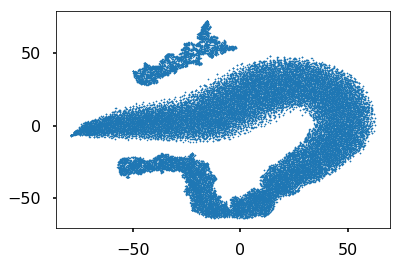

In [63]:
# Select the 0th feature
xs = all_word_vectors_matrix_2d[:,0]

# Select the 1st feature
ys = all_word_vectors_matrix_2d[:,1]

#sns.set_context("poster")
plt.scatter(xs,ys, s = 1)
plt.show()

In [27]:
# Can create dataframe from list of tuples, not just from dictionaries

points = pd.DataFrame(
    [
        (word, coords[0], coords[1])
        for word, coords in [
            (word, all_word_vectors_matrix_2d[titles2vec.wv.vocab[word].index])
            for word in titles2vec.wv.vocab
        ]
    ],
    columns = ["word", "x", "y"]
)

print(points.head())
print(points.tail())

               word          x          y
0             higgs -14.147339 -33.589531
1      line_bundles  26.385162 -31.348669
2  green_lazarsfeld -30.760450 -18.452703
3              sets  17.560095 -39.885418
4              maps  17.317108 -42.461403
                        word          x          y
40889        rotating_kepler  19.482691  20.419487
40890              semi_fano -17.808743   7.992526
40891  symplectic_foliations   0.888914  23.083088
40892    hyperpolygon_spaces   6.345885  39.424370
40893       stable_quasimaps  10.747270  57.017887


In [28]:
# Save t-SNE coordinates
points.to_csv('w2v_points.csv',index=False)

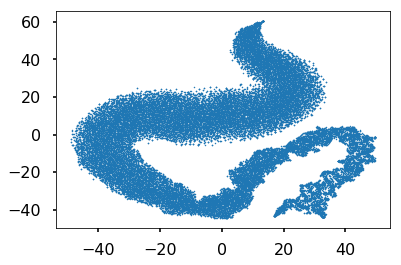

In [36]:
sns.set_context("poster")
# points.plot.scatter("x", "y", s=10, figsize=(20, 12))
plt.scatter(points['x'], points['y'], s = 1)
plt.show()

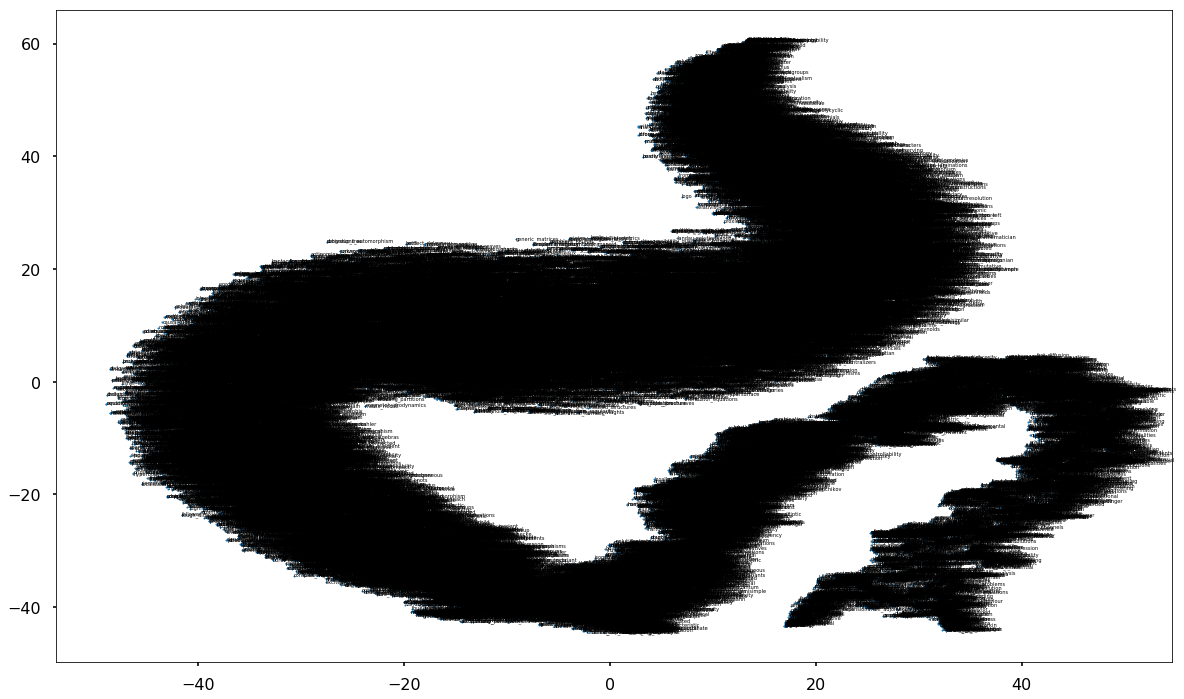

In [38]:
# annotate words in our t-SNE point-cloud

plt.figure(figsize=(20, 12))

for x, y, word in zip(points['x'], points['y'], points['word']):
    plt.annotate(word, (x, y), fontsize=5)

plt.scatter(points['x'], points['y'], s = 2)
plt.show()

In [51]:
# Plot zoomed regions
def plot_region(x_bounds, y_bounds):
    s = points[ (points['x'] >= x_bounds[0]) & (points['x'] <= x_bounds[1])] 
    s = s[(s['y'] >= y_bounds[0]) & (s['y'] <= y_bounds[1])]
    plt.figure(figsize=(10, 8))
    ax = plt.scatter(s['x'],s['y'],s=33)
#    for i, point in s.iterrows():
#        ax.text(point.x + 0.005, point.y + 0.005, point.word, fontsize=10)
    for x, y, word in zip(s['x'], s['y'], s['word']):
        plt.annotate(word, (x + 0.005, y + 0.005), fontsize=10)
    plt.show()

# 's' is a "restricted" dataframe, restricted in both x- and y-directions        
# nditer for iterating through rows of numpy array

# plot_region((-10,10),(-10,10))

In [52]:
# Given a query word, plot nearby words
def plot_nearby(word,side_len=4):
    if side_len <= 0:
        print('---------------------side_len must be greater than zero!---------------------')
    elif word not in titles2vec.wv.vocab:
        print('---------------------Cannot find %s in the vocabulary---------------------' % word)
    else:
        coordinates = points[points['word']==word].reset_index() # reset index to 0, only one row
        x, y = coordinates.loc[0,'x'], coordinates.loc[0,'y']
        x1, x2, y1, y2 = x-side_len/2, x+side_len/2, y-side_len/2, y+side_len/2
        plot_region(x_bounds=(x1,x2), y_bounds=(y1,y2))
#    except Exception as e: # don't fully understand this; shouldn't it be a ValueError if word isn't in vocabulary?
#        print('---------------------Cannot find %s in the vocabulary---------------------' % word)

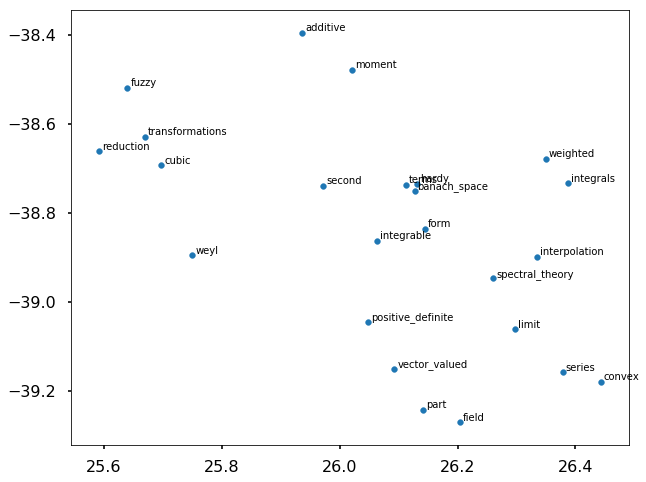

In [59]:
plot_nearby('integrable',1)

# Building the recommendation system: nearest 5

Already associated a vector (with 25 components) with each word/bigram in the corpus.  Now SUM these vectors to get vector associated with paper title.

In [27]:
import numpy as np

# stop_words = set(stopwords.words("english"))
stop_words = stopwords.words("english")

def title_to_vec(title, model=titles2vec, dim=25):
    result = np.zeros(dim)
    # result = [0] * dim
    
    clean_1 = unidecode.unidecode(title) # to remove diacritical marks
    clean_2 = re.sub("[^a-zA-Z0-9]", " ", clean_1)
    words = bigram[clean_2.split()]
    words = [w.lower() for w in words if w not in stop_words and len(w)>3]
    
    for word in words:
        if word in model.wv.vocab:
            w2v = model.wv[word]
            result += w2v
    
    return result # maybe remove .tolist()

In [28]:
titles_df['title_vec'] = titles_df['title'].apply(lambda x: title_to_vec(x, model = titles2vec, dim = 25))

In [29]:
# print(titles_df.iloc[:5,1])
# print(titles_df['title_vec'][:5])

# print(titles_df.head())

title_vec_dict = {}

for title, vec in zip(titles_df['title'],titles_df['title_vec']):
    title_vec_dict[title] = vec

Any search entry is regarded as a title.  Then compare vectors using cosine similarity.

In [30]:
def cos_sim(v1, v2):
    """Returns a cosine similarity of two vectors"""
    norm1, norm2 = np.linalg.norm(v1), np.linalg.norm(v2)
    norm_product = norm1 * norm2
    # norm_ratio = min(norm1, norm2) / max(norm1, norm2) !!!!!!
    if norm_product == 0:
        return 0
    else:
        return np.dot(v1, v2) / norm_product

In [80]:
# Just as we cleaned titles and converted them to vectors, we must clean the search entry
def clean_title(title):
    clean_1 = unidecode.unidecode(title) # to remove diacritical marks
    clean_2 = re.sub("[^a-zA-Z0-9]", " ", clean_1)
    words = bigram[clean_2.split()]
    return " ".join([w.lower() for w in words if w not in stop_words and len(w)>3])

In [31]:
def get_most_similar_title(title, dataframe = titles_df, model = titles2vec, dim = 25, k = 5):
    """Returns the k most similar titles to the new_title"""
#    new_title = clean_title(title)
    new_vec = title_to_vec(title, model, dim)
    sim_list = titles_df[titles_df['title'] != '']['title_vec'].apply(lambda x: cos_sim(new_vec, x))
    sim_list_sorted = sim_list.sort_values(ascending = False)
    
#    return sim_list
    
    indices = list(sim_list_sorted.index)[:k]
    
    similar_titles = [titles_df.loc[i, 'title'] for i in indices]
    
#    print("Search: " + new_title)
#    print('Similar Articles:\n')
#    for i, title in enumerate(similar_titles):
#        print('('+str(i+1)+')  '+title+'\n')
    
    return similar_titles

In [128]:
print(titles_df.head())
print(titles_df.info())

                                               title  \
0  Higgs line bundles, Green-Lazarsfeld sets,and ...   
1                     A theory of algebraic cocycles   
2                                 Zariski Geometries   
3  Configuration spaces and the space of rational...   
4        Stable vector bundles on algebraic surfaces   

                                           title_vec  
0  [-0.002872767101507634, 0.027966177323833108, ...  
1  [0.01821284554898739, 0.013441238086670637, -0...  
2  [0.014700514264404774, -0.013986557722091675, ...  
3  [-0.0036784919211640954, 0.08958668168634176, ...  
4  [0.01953111868351698, 0.01327794294047635, 0.0...  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
title        1000 non-null object
title_vec    1000 non-null object
dtypes: object(2)
memory usage: 15.7+ KB
None


In [34]:
get_most_similar_title('curves')

['Degeneration of curves and analytic deformation',
 'Planar trees, slalom curves and hyperbolic knots',
 'Weighted integral formulas on manifolds',
 'The Kontsevich integral and quantized Lie superalgebras',
 "An elementary proof of Small's formula for null curves in PSL(2,C) and an analogue for Legendrian curves in PSL(2,C)"]

In [90]:
titles_df.to_csv('titles_df_test.csv', index = False)

In [135]:
test_df = pd.read_csv('titles_df_test.csv')
print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
title        1000 non-null object
title_vec    1000 non-null object
dtypes: object(2)
memory usage: 15.7+ KB
None


In [33]:
pickle.dump(title_vec_dict, open("title_vec_dict", "wb"))